# Project Title
---

Group Name

Team members:
- Abdullah Mohamed
- Abdulrahman Mohammed

## Introduction 
__Introduction to the topic__ 

    ...

---

## Problem Statement

The Olympic Games bring athletes from all over the world, but only a few end up winning medals. In this project we focused on how sex can differ betwe how age, height, and weight set medalists apart from those who don’t.

## Objectives:
__Questions that will guide the analysis to solve the problem__

    ...

---

## Exploratory Data Analysis (EDA):

### Data Info:
__Getting the data and exploring it (includes descriptive statistics)__

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Magic command to make your plot outputs appear
%matplotlib inline 

# Turn off scientific notation
pd.options.display.float_format = "{:,.2f}".format

# Load the Superstore .csv files
np.set_printoptions(legacy='1.25')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
# Create a DataFrame
olympics_df = pd.read_csv('..\\Data\\Original data\\athlete_events.csv')

In [4]:
#Shape
olympics_df.shape

(271116, 13)

In [5]:
#Data info
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  object 
 5   Weight  208241 non-null  object 
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 26.9+ MB


In [6]:
#Data statistics
olympics_df.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal
count,"271,116.00",271116,271116,"261,642.00",210945,208241,271116,271116,271116,271116,271116,271116,39783
unique,NaN,134732,6,NaN,95,220,1184,230,51,42,66,765,3
top,NaN,Robert Tait McKenzie,male,NaN,180.0cm,70.0kg,United States,USA,2000 Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,65687,NaN,12492,9625,17847,18853,13821,22426,38624,5733,13372
mean,"68,248.95",NaN,NaN,25.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"39,022.29",NaN,NaN,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"34,643.00",NaN,NaN,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"68,205.00",NaN,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"102,097.25",NaN,NaN,28.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Missing Values Count in percentage
olympics_df.isnull().mean() * 100

ID        0.00
Name      0.00
Sex       0.00
Age       3.49
Height   22.19
Weight   23.19
Team      0.00
NOC       0.00
Games     0.00
City      0.00
Sport     0.00
Event     0.00
Medal    85.33
dtype: float64

In [8]:
#To check for the sex column distribution

olympics_df['Sex'].value_counts()

Sex
male      65687
Male      65570
M         65337
FeMale    25083
Female    24791
F         24648
Name: count, dtype: int64

In [9]:
#To check for the Medal column distribution with the nulls

olympics_df['Medal'].value_counts(dropna=False)

Medal
NaN       231333
Gold       13372
Bronze     13295
Silver     13116
Name: count, dtype: int64

In [10]:
#Top 5 NOC
olympics_df['NOC'].value_counts().head(5)

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64

In [11]:
# To Check for duplicates
olympics_df.duplicated(subset=['ID','Games']).sum()


83664

### Data Handling: 
__Cleaning, transforming, and combining data__

In [12]:
# Standardizing the sex varaints into two Male and Female

olympics_df['Sex'] = olympics_df['Sex'].replace(['M', 'male'], 'Male')
olympics_df['Sex'] = olympics_df['Sex'].replace(['F', 'FeMale'], 'Female')
olympics_df['Sex'].value_counts()

Sex
Male      196594
Female     74522
Name: count, dtype: int64

In [13]:
# Clean Height and Weight columns 
olympics_df['Height'] = olympics_df['Height'].astype(str).str.replace('cm','').str.strip()
olympics_df['Weight'] = olympics_df['Weight'].astype(str).str.replace('kg','').str.strip()


In [14]:
# Change The Height, Weight and Age types
olympics_df['Height'] = pd.to_numeric(olympics_df['Height'], errors='coerce')
olympics_df['Weight'] = pd.to_numeric(olympics_df['Weight'], errors='coerce')
olympics_df['Age'] = pd.to_numeric(olympics_df['Age'], errors='coerce')
olympics_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [15]:
#Seperate the olympics_df into two dataframes based on the sex. This is to get more accurate median to fill in the missing values

male_df = olympics_df[olympics_df['Sex'] == 'Male'].copy()
female_df = olympics_df[olympics_df['Sex'] == 'Female'].copy()
male_df.shape
female_df.shape

(74522, 13)

In [16]:
# Impute the missing age values with the median based on the sex and the country

# Age for Male
male_age_df = male_df.groupby('NOC')['Age'].transform('median')
male_df['Age'].fillna(male_age_df, inplace=True)


# Age for Female
female_age_df = female_df.groupby('NOC')['Age'].transform('median')
female_df['Age'].fillna(female_age_df, inplace=True)


In [17]:
# Impute the missing Height values with the median based on the sex and the country

# Height for Male
male_height_df = male_df.groupby('NOC')['Height'].transform('median')
male_df['Height'].fillna(male_height_df, inplace=True)


# For Female
female_height_df = female_df.groupby('NOC')['Height'].transform('median')
female_df['Height'].fillna(female_height_df, inplace=True)

In [18]:
# Impute the missing Weight values with the median based on the sex and the country

# Weight for Male
male_weight_df = male_df.groupby('NOC')['Weight'].transform('median')
male_df['Weight'].fillna(male_weight_df, inplace=True)


# For Female
female_weight_df = female_df.groupby('NOC')['Weight'].transform('median')
female_df['Weight'].fillna(female_weight_df, inplace=True)

In [19]:
# To check if there is nulls after imputing 
male_df[['Age', 'Height', 'Weight']].isnull().sum()
female_df[['Age', 'Height', 'Weight']].isnull().sum()

Age       0
Height    7
Weight    5
dtype: int64

In [20]:
# Drop the nulls rows (some of the countries dont have any value to get the median from)
male_df = male_df.dropna(subset=['Height', 'Weight'])
female_df = female_df.dropna(subset=['Height', 'Weight'])

In [21]:
male_df[['Age', 'Height', 'Weight']].isnull().sum()
female_df[['Age', 'Height', 'Weight']].isnull().sum()

Age       0
Height    0
Weight    0
dtype: int64

In [22]:
# Change to 'No Medals' when there in null in the Medal column 
olympics_df['Medal'] = olympics_df['Medal'].fillna('No Medals')


### Analysis: 
__Answering the objectives through data analysis__



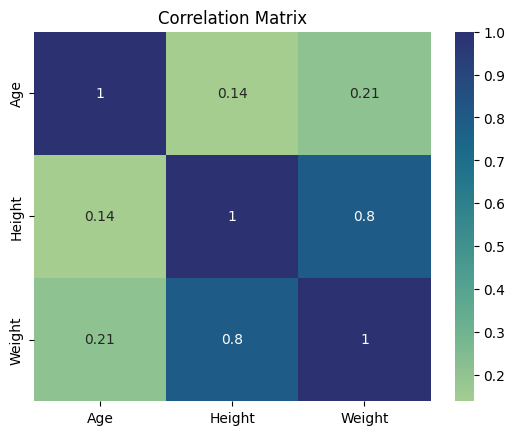

In [32]:
correlation = olympics_df[['Age','Height','Weight']].corr()
sns.heatmap(correlation, annot=True, cmap='crest')
plt.title("Correlation Matrix")
plt.show()


#### Observations: 

- Correlations between Age, Height and Weight are weak (<0.2).

- This means no single factor guarantees a medal outcome.

## Athelete Attributes distributions by Sex

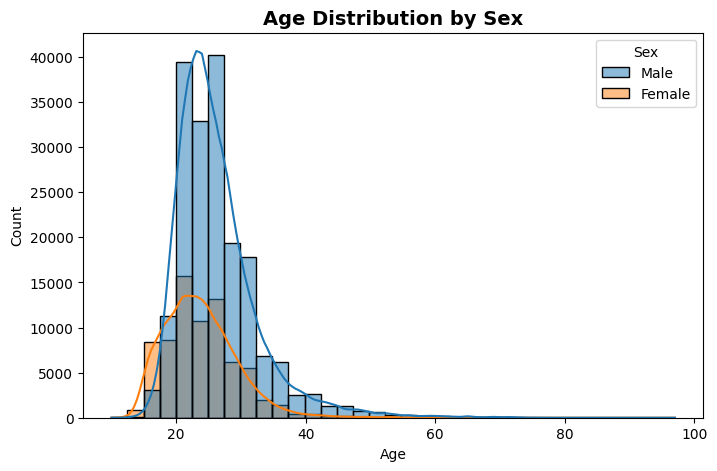

In [43]:
#Age distributions by Sex
plt.figure(figsize=(8,5))
sns.histplot(data=olympics_df, x='Age', hue='Sex', bins=35, kde=True)
plt.title("Age Distribution by Sex" , fontsize=14, fontweight="bold")
plt.show()

#### Observations:
- Male and female age distributions are very similar.

- Both peak in the mid-20s.

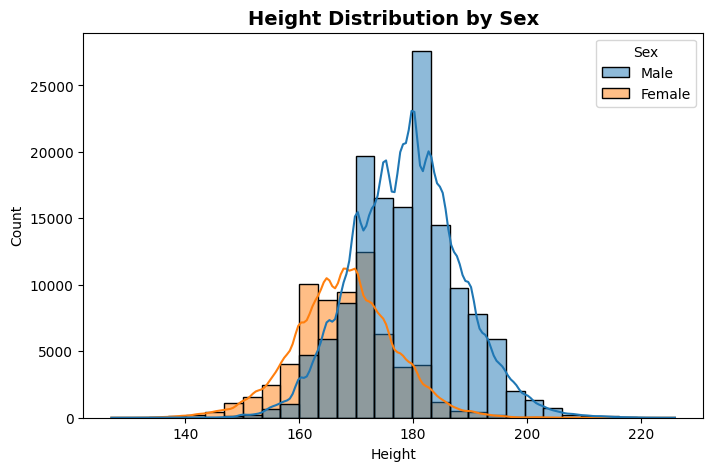

In [25]:
#Height distributions by Sex
plt.figure(figsize=(8,5))
sns.histplot(data=olympics_df, x='Height', hue='Sex', bins=30, kde=True)
plt.title("Height Distribution by Sex" , fontsize=14, fontweight="bold")
plt.show()

#### Observations:
- Males are generally taller than females.

- Female distribution is less spread.

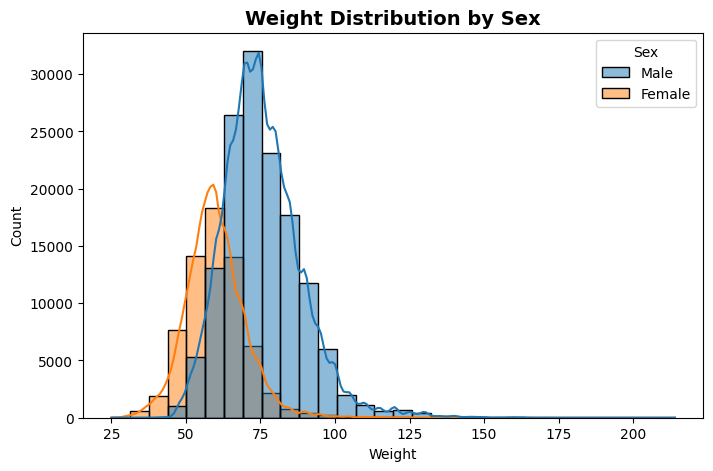

In [26]:
#Weight distributions by Sex
plt.figure(figsize=(8,5))
sns.histplot(data=olympics_df, x='Weight', hue='Sex', bins=30, kde=True)
plt.title("Weight Distribution by Sex" , fontsize=14, fontweight="bold")
plt.show()

#### Observations:

- Males are heavier on average.


## Athelete Attributes Distributions by Medal Types

In [24]:
tableau_colors = ["#4E79A7", "#F28E2B", "#76B7B2", "#E15759"]

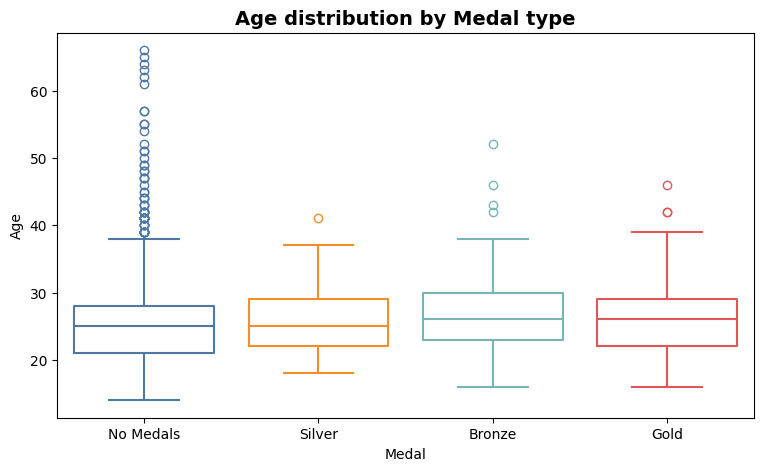

In [45]:
#Age distributions by Medal Types
plt.figure(figsize=(9,5))
sns.boxplot(data=olympics_df.sample(2000, random_state=1), x = 'Medal', y = 'Age', palette = tableau_colors, fill=False, native_scale = True)
plt.title('Age distribution by Medal type', fontsize=14, fontweight='bold')
plt.show()


#### Observations:
- Both Males and Females peak in the mid-20s.

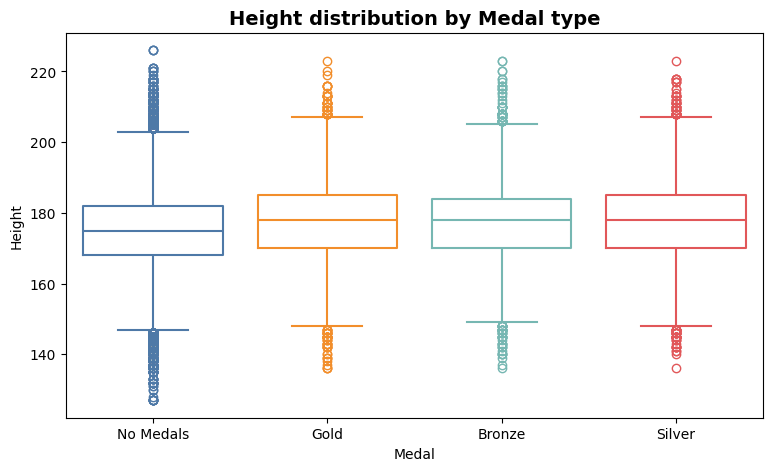

In [47]:
plt.figure(figsize=(9,5))
sns.boxplot(data=olympics_df, x='Medal', y='Height', palette=tableau_colors, fill=False, native_scale = False)
plt.title('Height distribution by Medal type', fontsize=14, fontweight='bold')
plt.show()


# Observations:
- Males are heavier on average.

- Female weights distribution is less spread.

- Both groups peak in the mid-20s.

- Medalists’ distribution is slightly tighter.

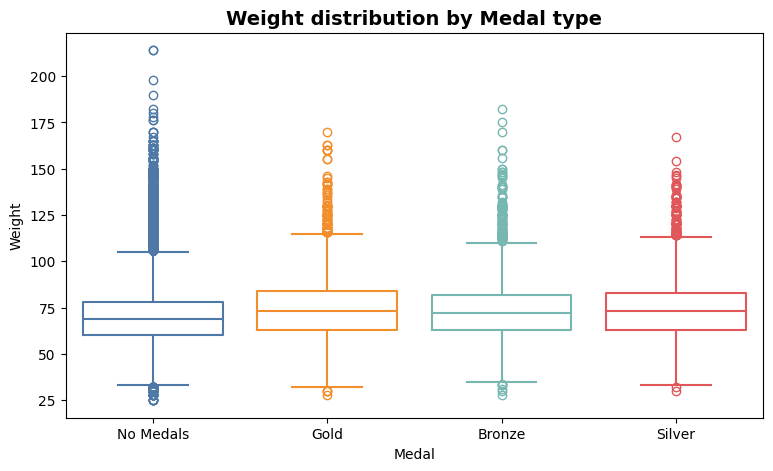

In [48]:
plt.figure(figsize=(9,5))
sns.boxplot(data=olympics_df, x='Medal', y='Weight', palette=tableau_colors, fill=False, native_scale = True)
plt.title('Weight distribution by Medal type', fontsize=14, fontweight='bold')
plt.show()


#### Observations:
- Males are heavier on average.

- Female weights distribution is less spread.

- Both groups peak in the mid-20s.

- Medalists’ distribution is slightly tighter.

In [33]:
olympics_df.to_csv("..\\Data\\Cleaned Data\\cleaned.csv", index=False)

---

## Summary
__Summarizing the key insights from the analysis__

**Note**: _Use Bullet Points_

    ...

## Recommendations/Conclusion
**Note**: _Use Bullet Points_

    ...